<a href="https://colab.research.google.com/github/AnmolMohak/Country_classification/blob/main/Country_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing clustering libraries
from sklearn.cluster import KMeans

# importing feature scaling libraries.
from sklearn.preprocessing import StandardScaler



In [5]:
dataset=pd.read_csv("/content/Country-data_Original.csv")
dataset.head()
type(dataset)

pandas.core.frame.DataFrame

export , health and import are in % of GDPP

In [6]:
dataset.info()
# only "country" is datatype object
# ni missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


converting export,health and import to their original vlaues.

In [7]:
# multiplying above three feature with gdpp
dataset[['exports','health','imports']]=dataset[['exports','health','imports']].apply(lambda x: x*dataset['gdpp']/100)


In [8]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
dataset.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


It seems that there migh be cases of Outliers in almost every feature.

Visulaisation of features.

In [10]:
dataset.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

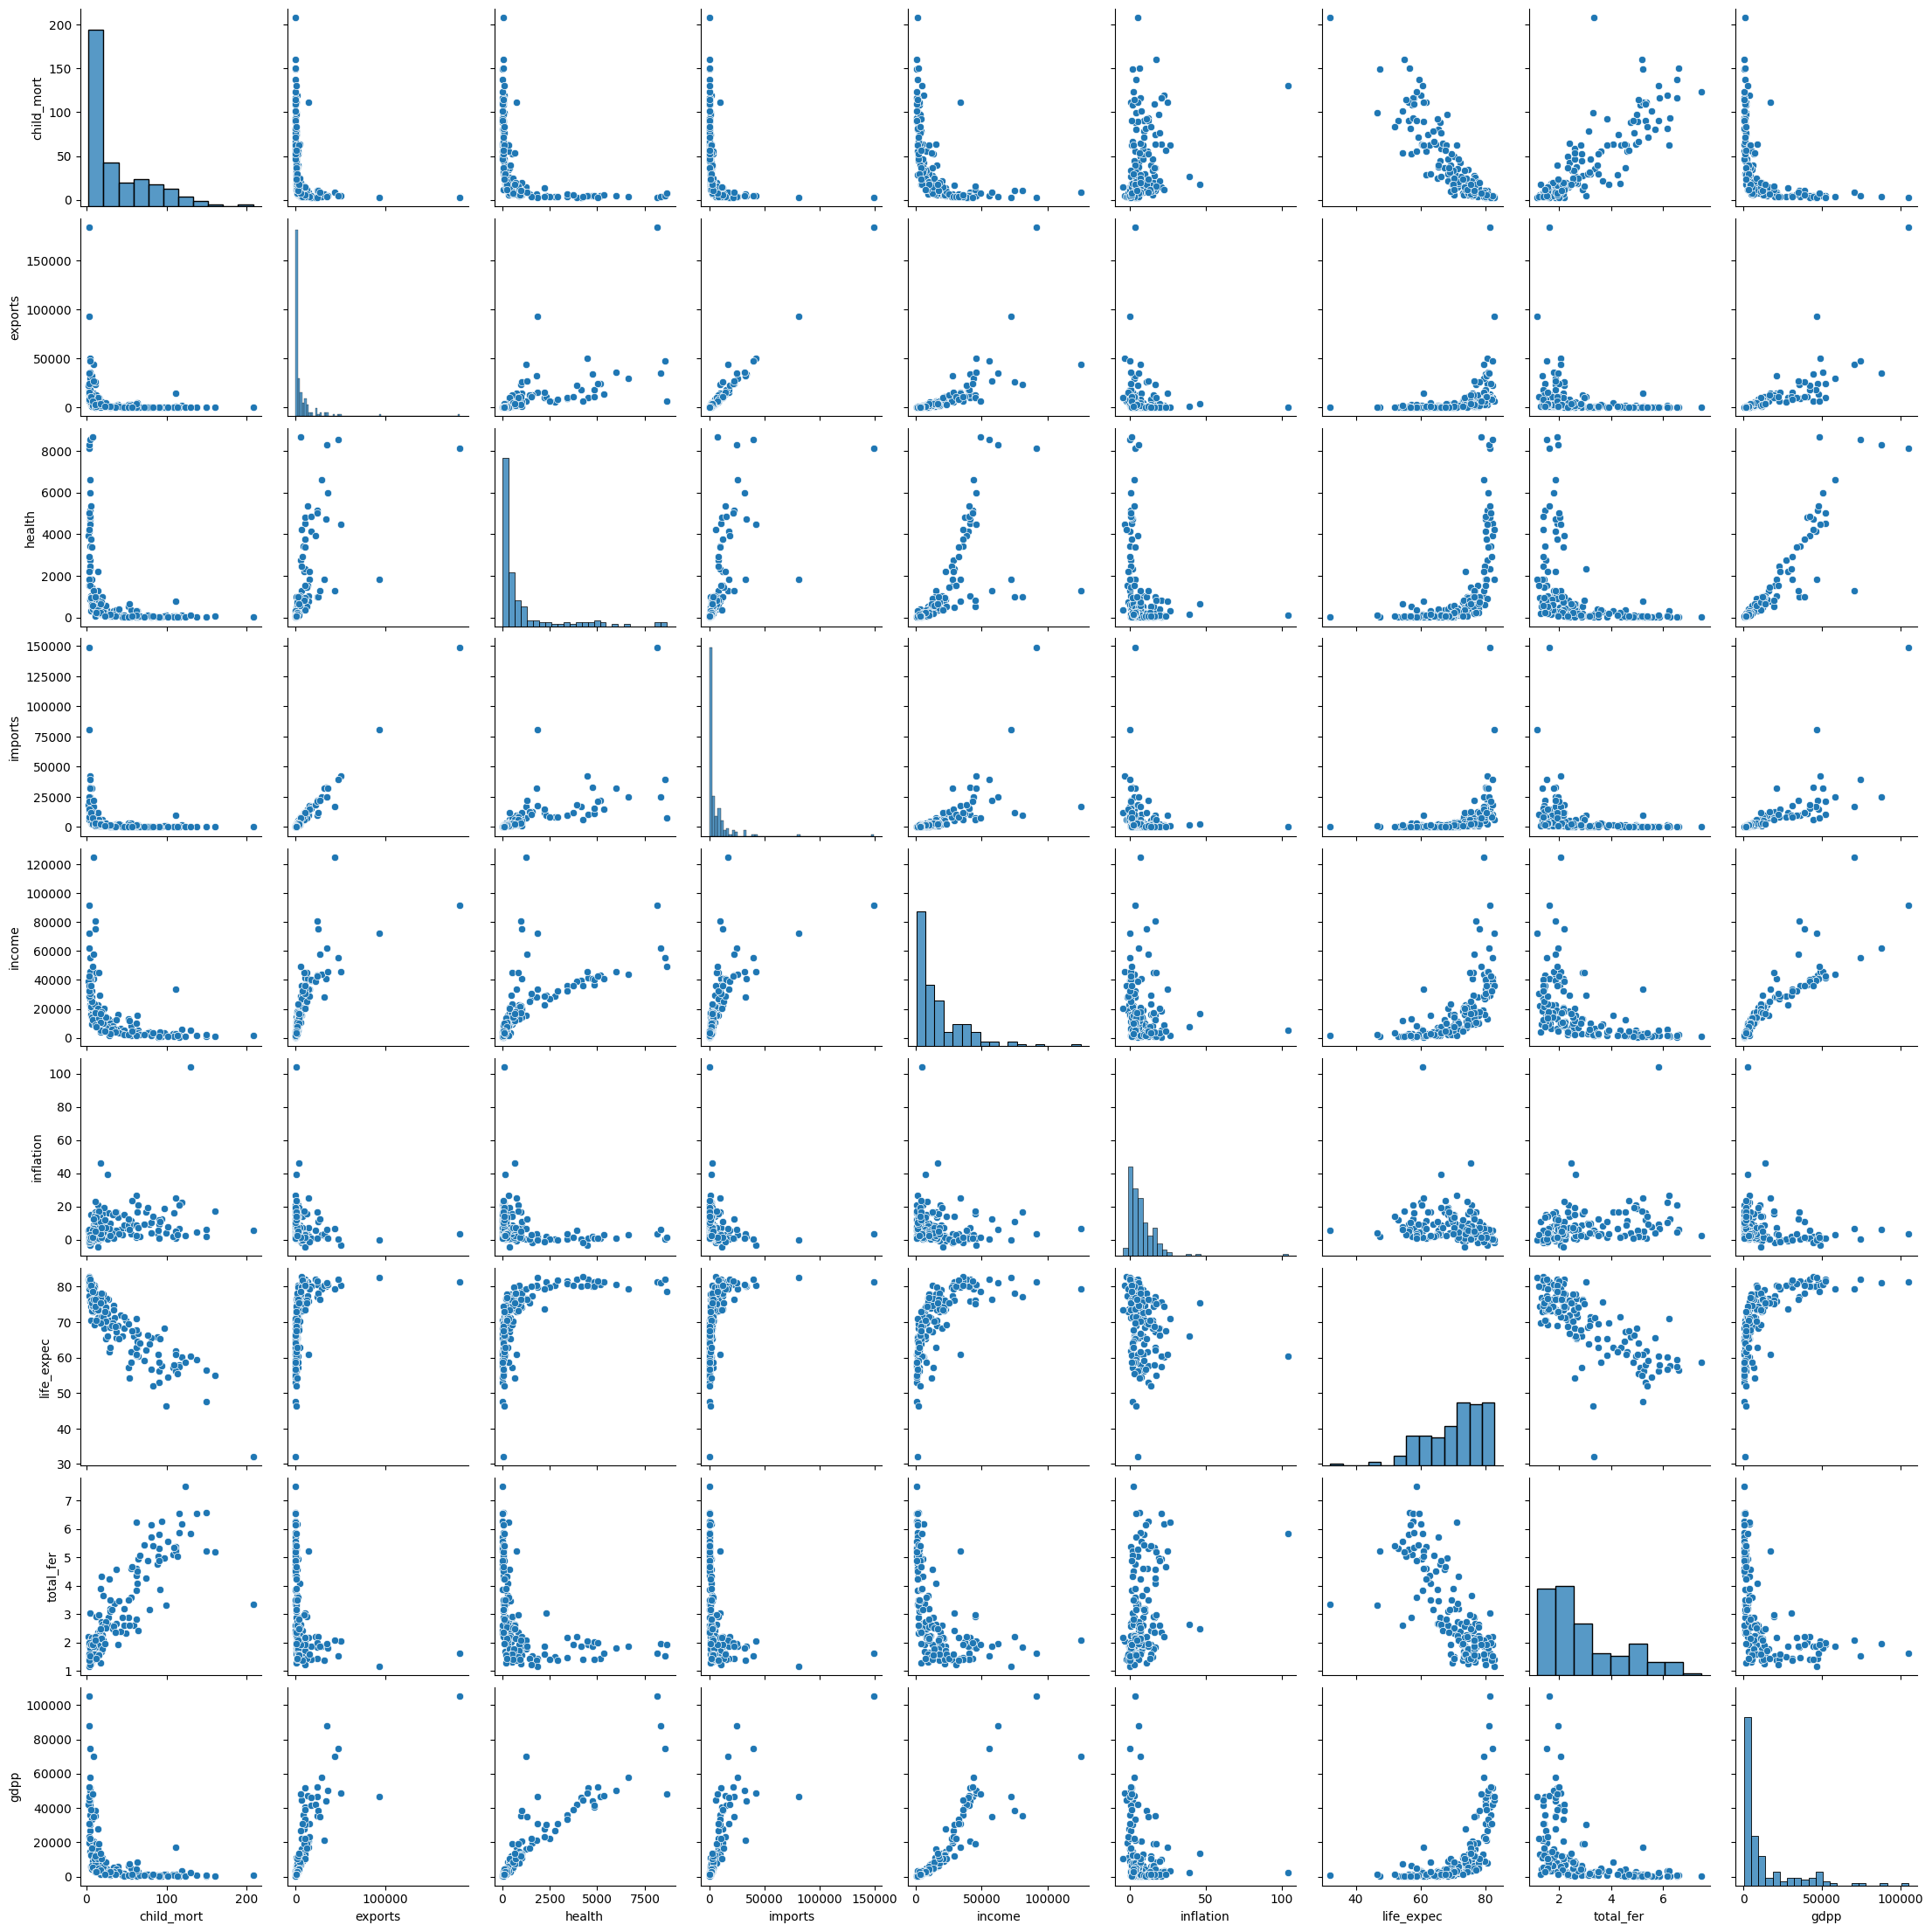

In [11]:
sns.pairplot(dataset)
plt.show()

<ipython-input-12-b7542d29161f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='Blues')


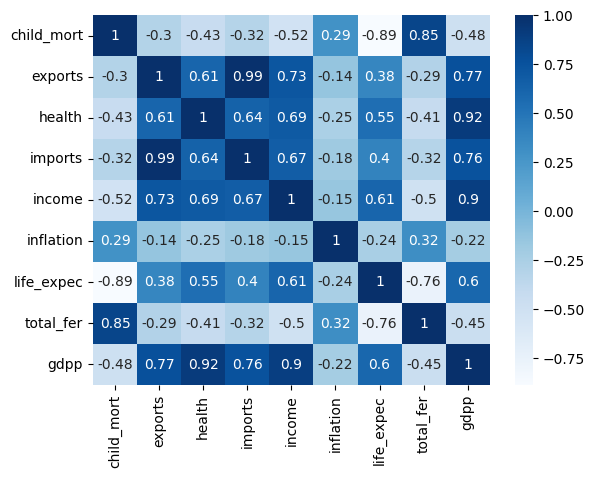

In [12]:
sns.heatmap(dataset.corr(),annot=True,cmap='Blues')
plt.show()

Some observation:
1. Export and import corr is 0.99 means amount of export is almost equal to import which is not very favarouble.
2.income and gdpp corr is 0.9.
3. Child mortality and life expectancy corr is -0.89

<Figure size 800x800 with 0 Axes>

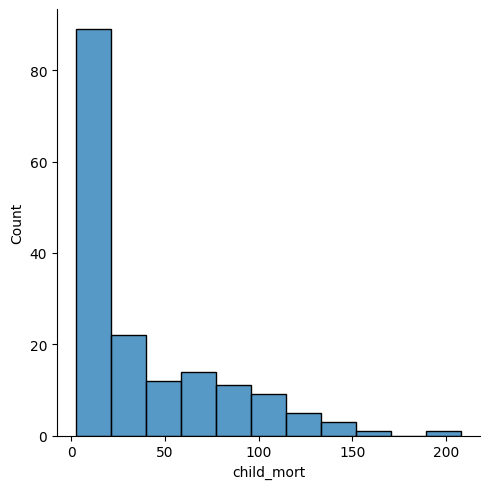

<Figure size 800x800 with 0 Axes>

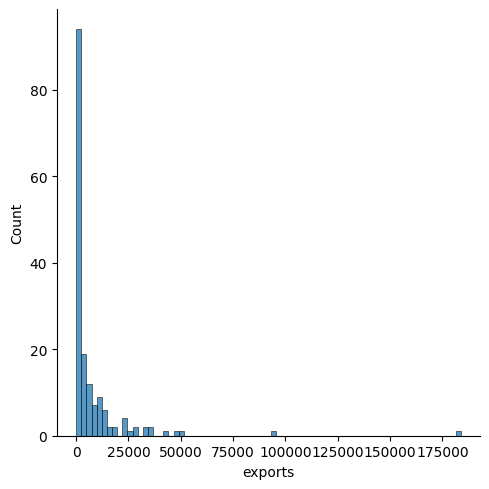

<Figure size 800x800 with 0 Axes>

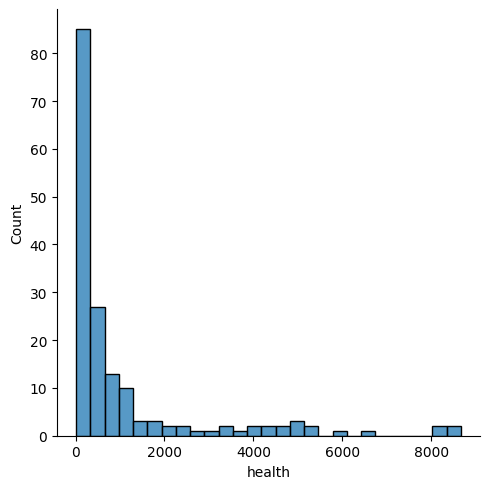

<Figure size 800x800 with 0 Axes>

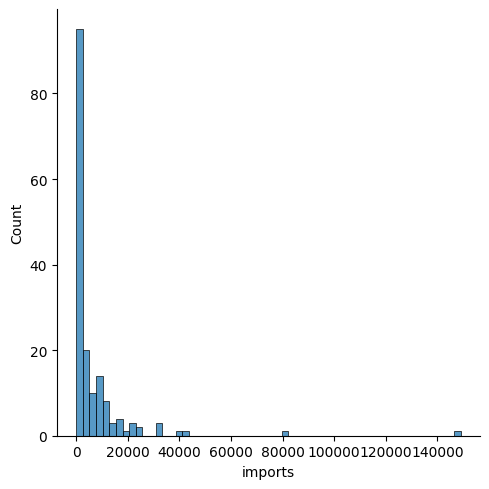

<Figure size 800x800 with 0 Axes>

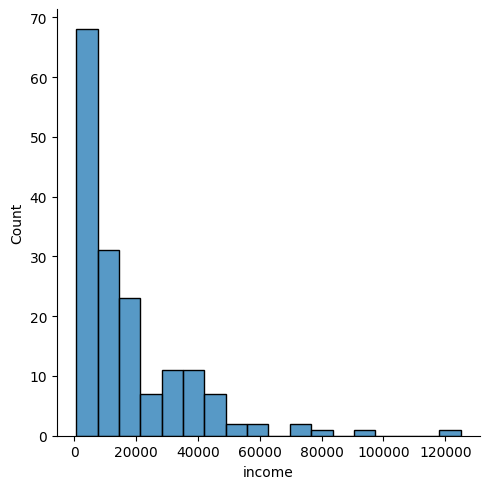

<Figure size 800x800 with 0 Axes>

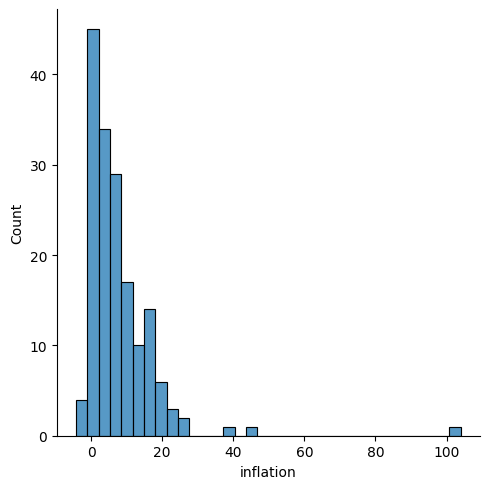

<Figure size 800x800 with 0 Axes>

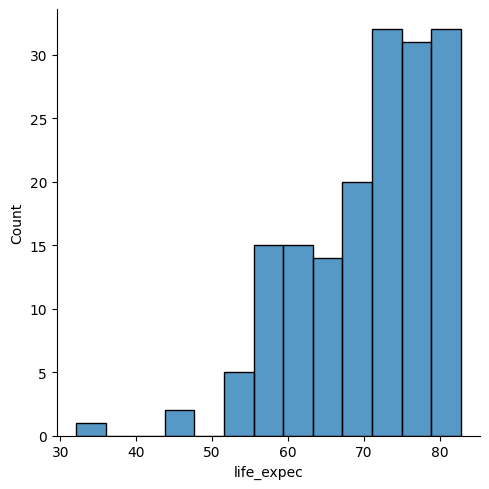

<Figure size 800x800 with 0 Axes>

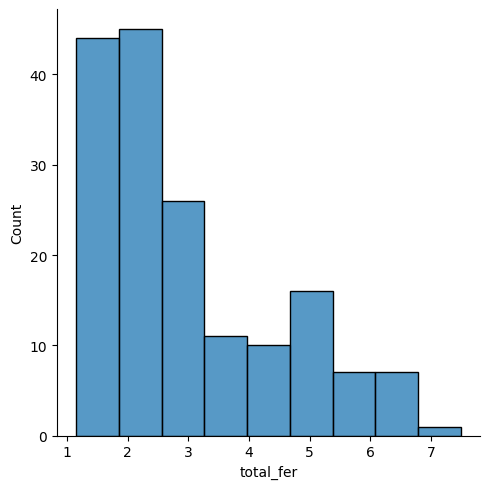

<Figure size 800x800 with 0 Axes>

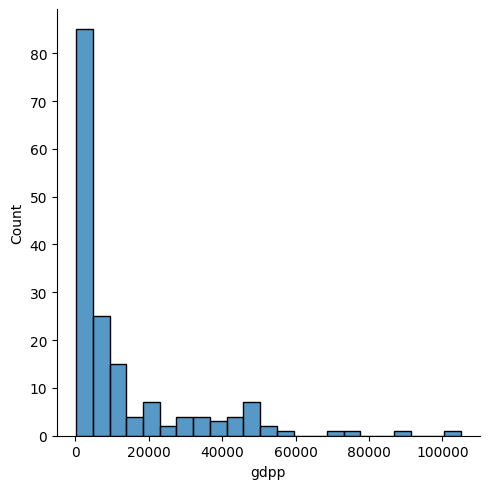

In [13]:
for feature in dataset.drop(columns='country',axis=1).columns:
  plt.figure(figsize=(8,8))
  sns.displot(dataset[feature])

Most  of them (+)ve  skewed because of ouliers.

In [14]:
len(dataset.columns)

10

<ipython-input-15-52149a0fc785>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,3,i+1)


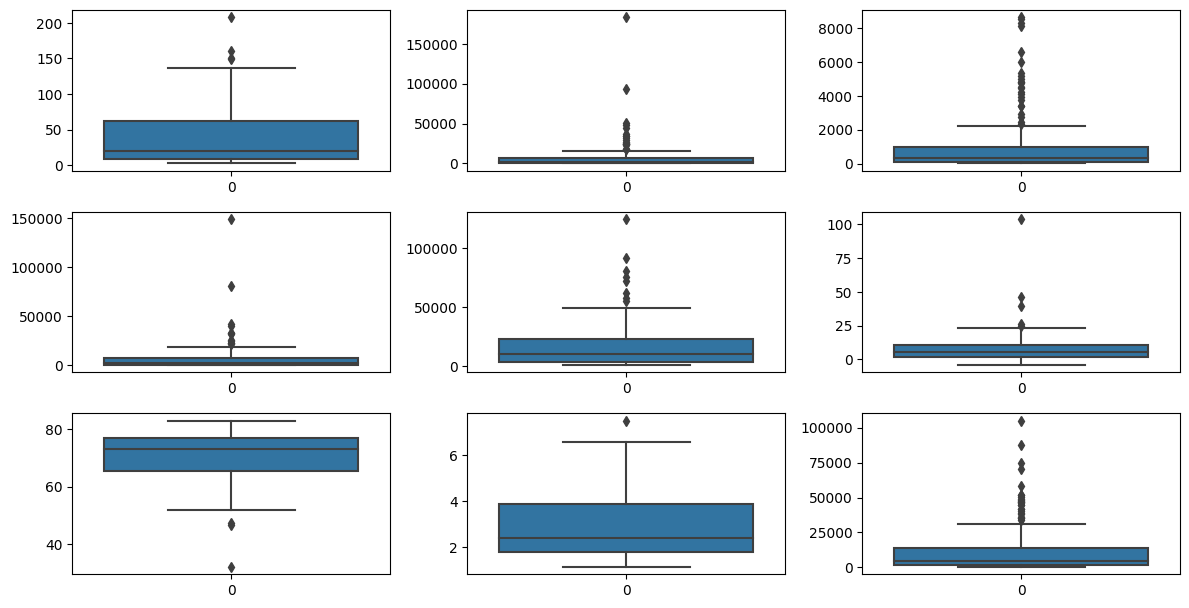

In [15]:
# viewing in box plot

plt.subplots(figsize=(12,12))
for i, feature in enumerate(dataset.drop(columns='country',axis=1).columns):
  plt.subplot(6,3,i+1)
  plt.subplots_adjust(hspace=2)
  sns.boxplot(dataset[feature])
  plt.ylabel=feature
  plt.tight_layout()

Since out dataset has many outliers so we have deal with it.
Method to be applied is IQR method. We have to also decide that which feature need outlier treatment.

1. child mortality: If capping is done for outliers in child mortality then it may happen that actual underdeveloped country will be not reflected.(#No Treatment)

2.Applying for all other feature

OR we can perform PCA and then perform to thode features only

In [16]:
dataset.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [17]:
updated_dataset=dataset[:]
updated_dataset.head()
#updated_dataset.to_excel('updated_dataset.xlsx')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [18]:
updated_dataset=dataset

In [19]:
#Outlier Treatment

def Outlier_treatment(dataset,column):
  Q1=dataset[column].quantile(0.25)
  Q3=dataset[column].quantile(0.75)
  Upper_limit=Q3+1.5*(Q3-Q1)
  Lower_limit=Q1-1.5*(Q3-Q1)
  return updated_dataset[column].apply(lambda x: Upper_limit if x > Upper_limit else Lower_limit if x < Lower_limit else x)

for column in ['life_expec','exports','health','imports','income','inflation','total_fer','gdpp']:
  updated_dataset[column]=Outlier_treatment(dataset,column)


In [20]:
updated_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


<ipython-input-21-95b467c28d30>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,3,i+1)


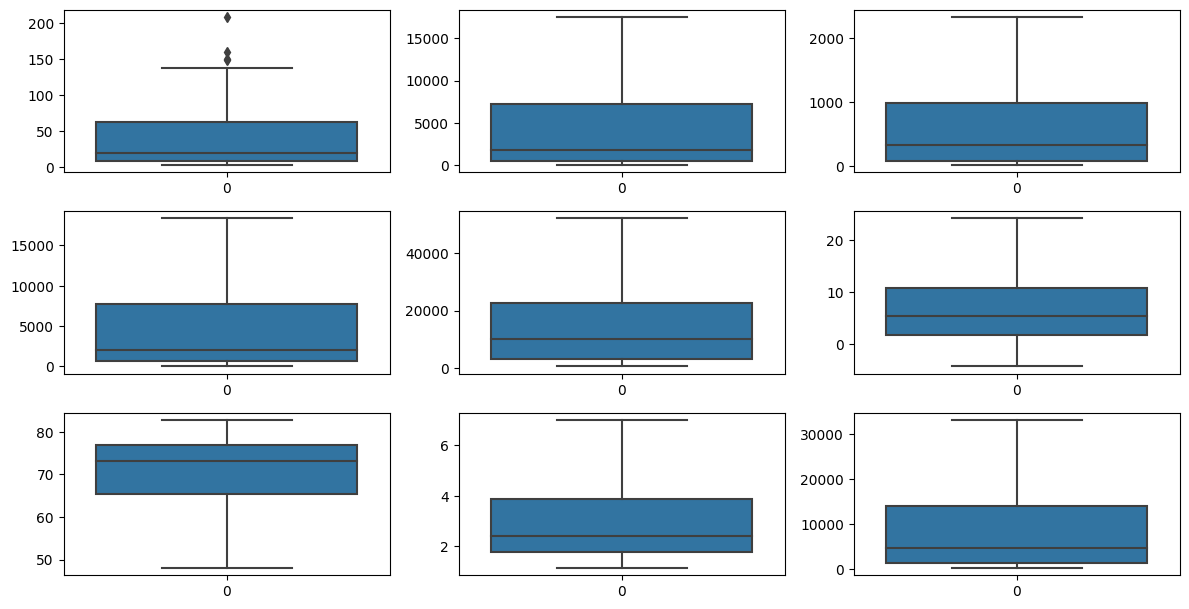

In [21]:
plt.subplots(figsize=(12,12))
for i, feature in enumerate(updated_dataset.drop(columns='country',axis=1).columns):
  plt.subplot(6,3,i+1)
  plt.subplots_adjust(hspace=2)
  sns.boxplot(updated_dataset[feature])
  plt.ylabel=feature
  plt.tight_layout()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Applying Feature scaling

In [23]:
scaler=StandardScaler()
updated_dataset=scaler.fit_transform(updated_dataset.iloc[:,1:])

In [24]:
from numpy import number

WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,max_iter=500)
  kmeans.fit(updated_dataset)
  WCSS.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

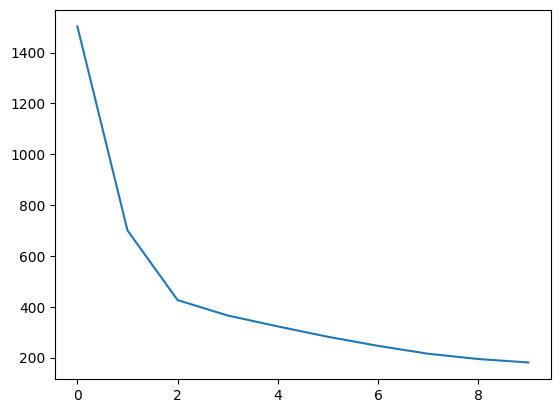

In [25]:
plt.plot(WCSS)
plt.xlabel='NO. of Cluster'
plt.ylabel='WCSS'
plt.show()

from elbow graph we can see that number of cluster =2 would be good

Trainning KMeans Model

In [26]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,max_iter=500)
Y=kmeans.fit_predict(updated_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
cluster=pd.DataFrame(Y,columns=['Cluster_number'])

In [28]:
#cluster.to_excel('cluster_number.xlsx')


In [29]:
# concatination is not being carried out so I have made two excel file and outside Python i will merge them .
#clustered_dataset=pd.concat([updated_dataset,cluster],axis=1)

In [31]:
updated_dataset_withcluster=pd.read_excel('/content/updated_dataset_withcluster.xlsx')
updated_dataset_withcluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_number
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [32]:

for i in range(0,3):
  print(f'Country clustered in number {i} are:')
  print(updated_dataset_withcluster[updated_dataset_withcluster['Cluster_number']==i].country.unique())

Country clustered in number 0 are:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Fiji' 'Georgia'
 'Grenada' 'Guatemala' 'Guyana' 'India' 'Indonesia' 'Iran' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Mauritius'
 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco'
 'Myanmar' 'Nepal' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland'
 'Romania' 'Russia' 'Samoa' 'Serbia' 'Seychelles' 'South Africa'
 'Sri Lanka' 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan'
 'Thailand' 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam']
Country clustered in numbe

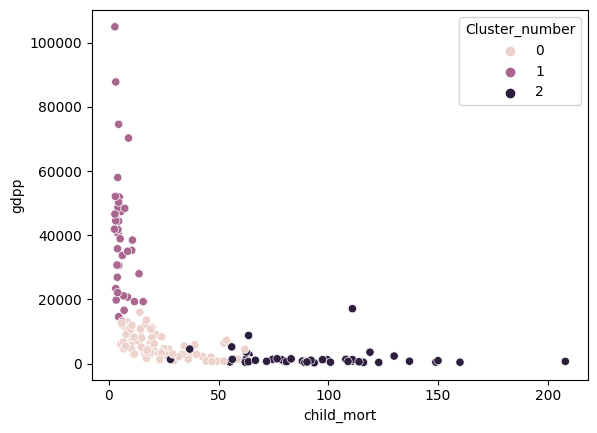

In [33]:
sns.scatterplot(data=updated_dataset_withcluster,x='child_mort',y='gdpp',hue='Cluster_number')
plt.show()
# we can see relation between Income Vs Gdpp
#                             Income Vs Child_mort

therefore under developed country are clssified as 2nd goup.

In [34]:
updated_dataset_withcluster.value_counts('Cluster_number')

Cluster_number
0    80
2    46
1    41
dtype: int64

In [35]:
# now for selecting top 10 country who are in immediate need can be ones we will take means of three critical feature
#1. Child Mortality
#2.Income
#3.gdpp
#by using groupby on cluster  number

In [36]:
child_mort=updated_dataset_withcluster.groupby(['Cluster_number']).mean().child_mort
income=updated_dataset_withcluster.groupby(['Cluster_number']).mean().income
gdpp=updated_dataset_withcluster.groupby(['Cluster_number']).mean().gdpp

<ipython-input-36-38a7c0a798f0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  child_mort=updated_dataset_withcluster.groupby(['Cluster_number']).mean().child_mort
<ipython-input-36-38a7c0a798f0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income=updated_dataset_withcluster.groupby(['Cluster_number']).mean().income
<ipython-input-36-38a7c0a798f0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdpp=updated_dat

In [37]:
means_dataset=pd.concat([child_mort,income,gdpp],axis=1)
means_dataset

,child_mort,income,gdpp
Cluster_number,,,
0,23.353750,11232.375000,5786.275000
1,5.651220,43970.731707,39612.195122
2,93.284783,3516.804348,1695.913043


In [39]:
final_list=updated_dataset_withcluster[(updated_dataset_withcluster['Cluster_number']==2) & (updated_dataset_withcluster['child_mort']>93)&(updated_dataset_withcluster['income']< 3516)&(updated_dataset_withcluster['gdpp']<1695)]

In [41]:
final_list.country

17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
37             Congo, Dem. Rep.
40                Cote d'Ivoire
63                       Guinea
64                Guinea-Bissau
66                        Haiti
87                      Lesotho
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
132                Sierra Leone
Name: country, dtype: object